## <center> ANN Exercise MPG </center>

In this worksheet it will be predicted how many miles can a car travel with one gallon of gas. This term is usually referred to as miles per gallon (MPG). For this case study, it will be used one of the classic datasets:
<center>Auto MPG dataset.</center> 

Auto MPG was initially used in the 1983 American Statistical Association Exposition. The data concerns prediction of city-cycle fuel consumption in miles per gallon in terms of three multivalued discrete and five continuous attributes.

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data exploration

In [2]:
df = pd.read_csv('C:/Users/Lenovo/Desktop/Python/Deep Learning/Data Sets/TensorFlow/mpg.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [5]:
df.drop(columns="name", inplace=True)

In [6]:
df.horsepower.replace("?", np.nan, inplace=True)
df.dropna(how="any", inplace=True)
df.horsepower = df.horsepower.apply(lambda x: float(x))

In this case, origin is set as Europe (1), USA (2) and Japan(3). To avoid that Japan has more importance or weight in the model, a OneHotEncoding is performed.

In [7]:
counts = df["origin"]

counts_data = pd.get_dummies(counts, drop_first=True)
counts_data.columns = ["USA", "Japan"]

In [8]:
df = pd.concat([df, counts_data], axis=1)
df.drop(columns="origin", inplace=True)

<AxesSubplot:>

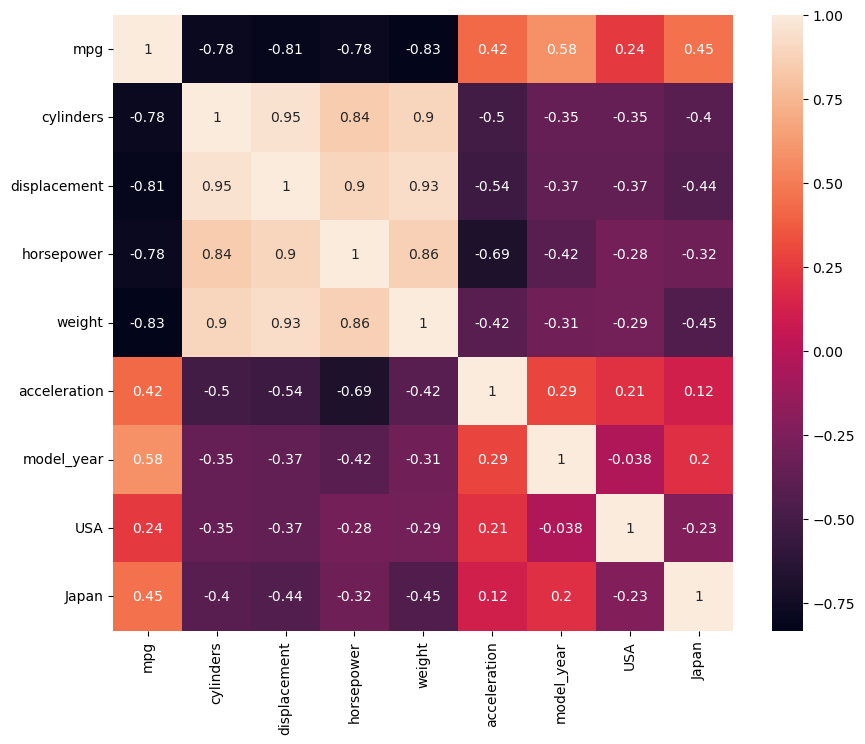

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

### Train Test Split and Scale

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [11]:
X = df.drop(columns="mpg").values
y = df["mpg"].values

In [12]:
X.shape, y.shape

((392, 8), (392,))

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [14]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Creating the Model

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [16]:
model = Sequential()
model.add(Dense(X.shape[1],  activation='relu'))

# hidden layers
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))

# output layer
model.add(Dense(units=1))

### Model Configuration

Now that we build the main network structure of our neural network, we need to configure our optimizer, cost function, and metrics before initiating the training. We will use Adam optimizer and mean squared error (MSE) in our neural network. Additionally, TensorFlow will provide us mean absolute error (MAE) values as well as MSE values. We can configure our model with the following code:

In [17]:
# Optimizer, Cost, and Metric Configuration
model.compile(
    optimizer='adam', 
    loss='mse', 
    metrics=['mae']
    )

# Early Stop Configuration
early_stop=tf.keras.callbacks.EarlyStopping( monitor='val_loss', patience=25)

In [18]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=1000,
          validation_split = 0.2,
          callbacks=[early_stop]
          )
# We set aside 20% of our train set for validation. Therefore, our neural network will evaluate the model even before the 
# test set. We set the epoch value to 1000, but it will stop early if it cannot observe a valuable improvement on the 
# validation loss/cost.

Epoch 1/1000
8/8 [==============================] - 1s 35ms/step - loss: 619.3698 - mae: 23.5939 - val_loss: 596.1602 - val_mae: 23.0704
Epoch 2/1000
8/8 [==============================] - 0s 7ms/step - loss: 614.4490 - mae: 23.4838 - val_loss: 590.7056 - val_mae: 22.9464
Epoch 3/1000
8/8 [==============================] - 0s 9ms/step - loss: 608.1132 - mae: 23.3447 - val_loss: 583.4420 - val_mae: 22.7848
Epoch 4/1000
8/8 [==============================] - 0s 9ms/step - loss: 599.6929 - mae: 23.1640 - val_loss: 574.1260 - val_mae: 22.5782
Epoch 5/1000
8/8 [==============================] - 0s 7ms/step - loss: 589.2789 - mae: 22.9363 - val_loss: 562.6442 - val_mae: 22.3219
Epoch 6/1000
8/8 [==============================] - 0s 8ms/step - loss: 576.4353 - mae: 22.6544 - val_loss: 548.6324 - val_mae: 22.0047
Epoch 7/1000
8/8 [==============================] - 0s 7ms/step - loss: 560.4456 - mae: 22.3033 - val_loss: 531.7131 - val_mae: 21.6137
Epoch 8/1000
8/8 [=============================

In [19]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

,loss,mae,val_loss,val_mae
0,619.369751,23.593937,596.160217,23.070435
1,614.449036,23.483778,590.705627,22.946434
2,608.113220,23.344688,583.442017,22.784773
3,599.692871,23.163967,574.125977,22.578203
4,589.278870,22.936329,562.644165,22.321901


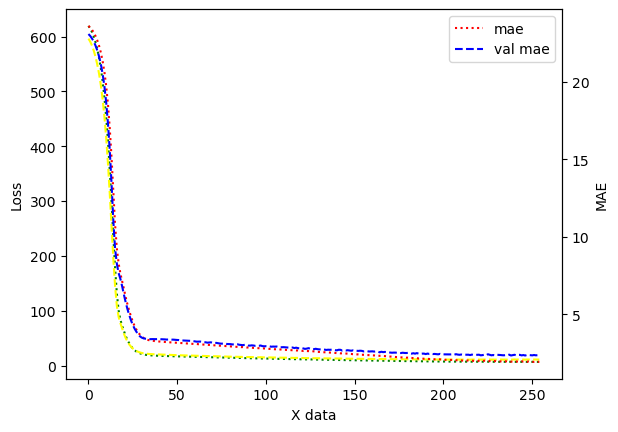

In [20]:
x = range(len(model_loss))
y1 = model_loss["loss"]
y11 = model_loss["val_loss"]
y2 = model_loss["mae"]
y21 = model_loss["val_mae"]


fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(x, y1, color="green", linestyle="dotted", label="loss")
ax1.plot(x, y11, color="yellow", linestyle="dashed", label="val loss")

ax2.plot(x, y2, color="red", linestyle="dotted", label="mae")
ax2.plot(x, y21, color="blue", linestyle="dashed", label="val mae")



ax1.set_xlabel('X data')
ax1.set_ylabel('Loss',)
ax2.set_ylabel('MAE')
plt.legend(loc="best")

plt.show()

### Evaluating the Results

In [21]:
model.evaluate(X_test, y_test, verbose=0)

[8.258272171020508, 2.0134899616241455]

3/3 [==============================] - 0s 0s/step


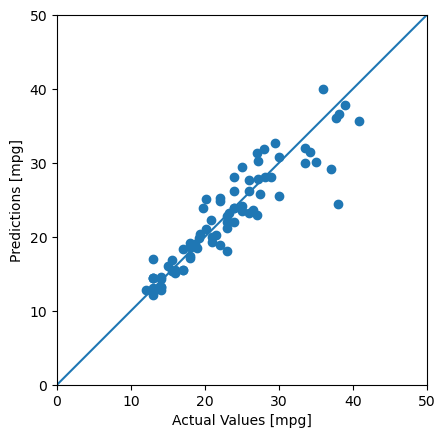

In [22]:
y_pred = model.predict(X_test).flatten()

evaluation_plot = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred)#Scatter Plot
plt.ylabel('Predictions [mpg]')#Y for Predictions
plt.xlabel('Actual Values [mpg]')#X for Actual Values
plt.xlim([0, 50])
plt.ylim([0, 50])
plt.plot([0, 50], [0, 50]) #line plot for comparison

### Making Predictions with a New Observation

In [23]:
# Prediction for Single Observation
# What is the MPG of a car with the following info:

new_car = np.array([[
    8, #cylinders
    307.0, #displacement
    130.0, #HP
    5504.0, #weight
    12.0, #acceleration
    70, #modelyear
    0, #USA
    0, # Japan
]])

new_car = scaler.transform(new_car)

model.predict(new_car)

1/1 [==============================] - 0s 24ms/step


array([[11.640239]], dtype=float32)